In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv('temp.csv', index_col = None)
df = df.drop(['Unnamed: 0'], axis = 1)

In [4]:
df.columns

Index(['year', 'state_code', 'county_code', 'species', 'latitude', 'longitude',
       'volume', 'Biomass', 'number_trees', 'mean_temp', 'mean_dwp',
       'mean_prcp', 'psgc', 'gssc', 'state_county', 'psgc1', 'psgc2', 'psgc3',
       'mean_biomass', 'dmean_biomass_dt', 'log_mean_mass',
       'dlog_mean_mass_dt', 'mean_volume', 'dmean_volume_dt',
       'log_mean_volume', 'dlog_mean_volume_dt'],
      dtype='object')

In [61]:
df[df.species.unique()] = pd.get_dummies(df.species)

In [72]:
np.append(species, inputs)

array(['loblolly pine', 'red maple', 'slash pine', 'sweetgum',
       'yellow-poplar', 'mean_temp', 'mean_prcp'], dtype=object)

In [205]:
df_copy = df.copy()
species = df.species.unique()
inputs = ['mean_temp','mean_prcp']

X = df_copy[np.append(inputs,species)]
y = df_copy['mean_biomass'].values / df_copy['mean_volume']

mask = np.isfinite(y) & (y < 60)

X = X[mask]
y = y[mask]

In [198]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [199]:
from sklearn.model_selection import cross_val_score

In [207]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1.0]

scores = []
coeffs = []

for a in alphas:
    ridge_pipe = Pipeline([('poly',PolynomialFeatures(6)),
                           ('reg', Ridge(alpha=a, normalize=True))])
    
    scores.append(np.mean( cross_val_score(ridge_pipe,X,y, scoring = 'neg_root_mean_squared_error') )) 
print(scores)

[-3.73438592056727, -3.59030537390941, -3.58684115964842, -3.5832622180388425, -3.5832991044825975, -3.5865829127537205]


In [201]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1.0]

scores = []
coeffs = []

for a in alphas:
    ridge_pipe = Pipeline([('poly',PolynomialFeatures(5)),
                           ('reg', Ridge(alpha=a, normalize=True))])
    
    scores.append(np.mean( cross_val_score(ridge_pipe,X,y, scoring = 'r2') )) 
print(scores)

[0.16547469162400405, 0.17094989869257604, 0.17463736078778913, 0.17478649116512057, 0.17477024317685713, 0.17298765924835133]


In [128]:
ridge_pipe = Pipeline([('poly',PolynomialFeatures(5)),
                           ('reg', Ridge(alpha=1e-3, normalize=True))])

ridge_pipe.fit(X,y)

ridge_pipe['reg'].coef_

res = y - ridge_pipe.predict(X)

np.round(np.sqrt( np.sum(np.power(res,2))/len(res) ),5)

19.2355

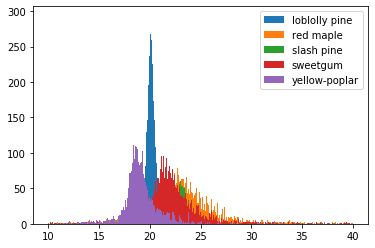

In [196]:
species = df.species.unique()
df_copy = df.copy()

for s in species:
    temp = df.copy()
    temp = temp.loc[temp.species == s]
    y = temp['mean_biomass'] / temp['mean_volume']

    mask = np.isfinite(y) & (y < 60)

    y = y[mask]

    plt.hist(y, bins = 1000, range = (10,40), label = s)
plt.legend()
plt.show()

(-5, 60)

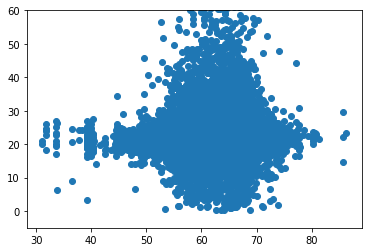

In [144]:
plt.scatter(df.mean_temp.values[mask], y)
plt.ylim(-5,60)

In [146]:
sum(y > 60) / len(y)

0.0033168633909781316

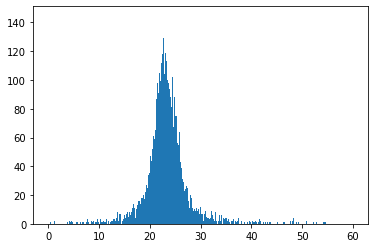

In [163]:
temp = df.copy()
temp = temp.loc[temp.species == 'red maple']
y = temp['mean_biomass'] / temp['mean_volume']

mask = np.isfinite(y) 

y = y[mask]

plt.hist(y, bins = 1000, range = (0,60))
plt.show()

In [179]:
temp = df.copy()
y = temp['mean_biomass'] / temp['mean_volume']

mask = np.isfinite(y)
y = y[mask]